In [1]:
import numpy as np 
import pandas as pd 
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
train_set = pd.read_csv("train.csv", nrows = 10000000)
test_set = pd.read_csv("test.csv")

In [3]:
train_set.shape

(10000000, 8)

In [4]:
test_set.shape

(9914, 7)

In [5]:
train_set.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [6]:
train_set.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,1.000000e+07,1.000000e+07,1.000000e+07,9.999931e+06,9.999931e+06,1.000000e+07
mean,1.133854e+01,-7.250775e+01,3.991934e+01,-7.250897e+01,3.991913e+01,1.684793e+00
std,9.799930e+00,1.299421e+01,9.322539e+00,1.287532e+01,9.237280e+00,1.323423e+00
min,-1.077500e+02,-3.439245e+03,-3.492264e+03,-3.426601e+03,-3.488080e+03,0.000000e+00
25%,6.000000e+00,-7.399207e+01,4.073491e+01,-7.399139e+01,4.073403e+01,1.000000e+00
50%,8.500000e+00,-7.398181e+01,4.075263e+01,-7.398016e+01,4.075316e+01,1.000000e+00
75%,1.250000e+01,-7.396710e+01,4.076712e+01,-7.396367e+01,4.076810e+01,2.000000e+00
max,1.273310e+03,3.457626e+03,3.344459e+03,3.457622e+03,3.351403e+03,2.080000e+02


In [7]:
train_set.isnull().sum()

key                   0
fare_amount           0
pickup_datetime       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude    69
dropoff_latitude     69
passenger_count       0
dtype: int64

In [8]:
test_set.isnull().sum()

key                  0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [9]:
train_set = train_set.drop(train_set[train_set.isnull().any(1)].index, axis=0)

In [10]:
train_set.shape

(9999931, 8)

In [11]:
from collections import Counter
Counter(train_set['fare_amount']<0)

Counter({False: 9999511, True: 420})

/Users/sarathchandra/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


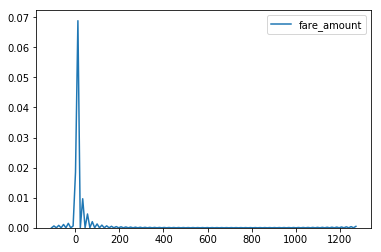

In [12]:
sns.kdeplot(train_set['fare_amount'])

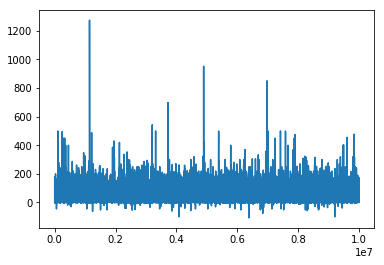

In [13]:
plt.plot(train_set['fare_amount'])

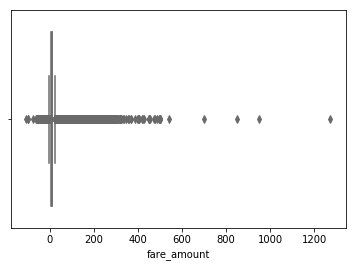

In [14]:
sns.boxplot( x= train_set["fare_amount"] , orient="h" , palette="Set3", color=".25",)

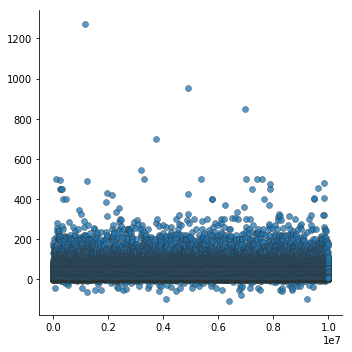

In [15]:
sns.relplot(data= train_set["fare_amount"],palette="YlGnBu", style="smoker",  markers=["D", "o"], sizes=(10, 125),
            edgecolor=".2", linewidth=.5, alpha=.75)

In [16]:
train_set = train_set.drop(train_set[train_set['fare_amount']<0].index, axis=0)
train_set.shape

(9999511, 8)

In [17]:
train_set['fare_amount'].describe()

count    9.999511e+06
mean     1.133935e+01
std      9.798654e+00
min      0.000000e+00
25%      6.000000e+00
50%      8.500000e+00
75%      1.250000e+01
max      1.273310e+03
Name: fare_amount, dtype: float64

In [18]:
train_set['fare_amount'].sort_values(ascending=False)

1144706    1273.31
4894706     952.00
6979398     850.00
3723759     698.16
3206977     542.83
3316931     500.00
7009310     500.00
7418789     500.00
101885      500.00
7583759     499.00
5388368     499.00
247671      495.00
1215047     488.00
9835597     477.92
7893818     475.00
9606167     454.64
233874      450.00
7872246     450.00
287638      450.00
7236013     450.00
329010      450.00
1950951     430.00
4907207     423.00
2127659     419.75
9825738     405.03
9489089     403.88
5784704     400.00
5782292     400.00
9484568     400.00
451974      400.00
            ...   
5867720       0.00
6204385       0.00
8521195       0.00
8740367       0.00
1614540       0.00
3682172       0.00
7188807       0.00
8002106       0.00
5251571       0.00
1291130       0.00
8748575       0.00
5153112       0.00
1833544       0.00
3925313       0.00
6756532       0.00
561786        0.00
6131401       0.00
2418406       0.00
9771770       0.00
5597946       0.00
1221438       0.00
5928092     

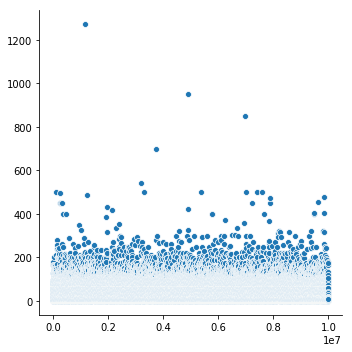

In [19]:
sns.relplot(data = train_set['fare_amount'])

In [20]:
train_set['passenger_count'].describe()

count    9.999511e+06
mean     1.684798e+00
std      1.323415e+00
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      2.080000e+02
Name: passenger_count, dtype: float64

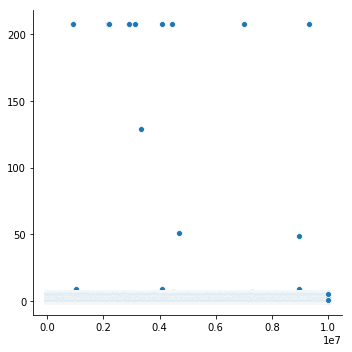

In [21]:
sns.relplot( data = train_set['passenger_count'])

In [22]:
train_set[train_set['passenger_count']>6]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
929022,2009-07-30 11:54:00.000000193,3.30,2009-07-30 11:54:00 UTC,0.000000,0.000000,0.000000,0.000000,208
1007609,2014-06-24 15:13:00.00000040,104.00,2014-06-24 15:13:00 UTC,-74.015780,40.715420,-74.170280,40.708340,9
2154045,2010-12-16 11:21:00.000000209,3.30,2010-12-16 11:21:00 UTC,0.000000,0.000000,0.000000,0.000000,208
2198549,2010-12-15 14:20:00.00000010,3.30,2010-12-15 14:20:00 UTC,0.000000,0.000000,0.000000,0.000000,208
2910347,2010-12-16 06:44:00.00000039,4.50,2010-12-16 06:44:00 UTC,0.000000,0.000000,0.000000,0.000000,208
3107489,2009-05-12 14:50:00.000000175,2.70,2009-05-12 14:50:00 UTC,-73.937818,40.758260,-73.937827,40.758250,208
3323791,2011-08-27 01:24:00.000000168,8.50,2011-08-27 01:24:00 UTC,-73.987858,40.760340,-74.000682,40.752413,129
4095440,2015-06-14 08:56:16.0000001,37.04,2015-06-14 08:56:16 UTC,-73.982094,40.756252,-73.872482,40.774506,9
4103745,2010-12-22 12:11:00.000000230,23.70,2010-12-22 12:11:00 UTC,0.000000,0.000000,0.000000,0.000000,208
4432483,2009-05-11 13:56:00.00000088,11.10,2009-05-11 13:56:00 UTC,-73.937733,40.758267,-73.937737,40.758273,208


In [23]:
Counter(train_set['passenger_count']>6)

Counter({False: 9999494, True: 17})

In [24]:
train_set = train_set.drop(train_set[train_set['passenger_count']>=7].index, axis=0)

In [25]:
train_set['passenger_count'].describe()

count    9.999502e+06
mean     1.684612e+00
std      1.308862e+00
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      1.290000e+02
Name: passenger_count, dtype: float64

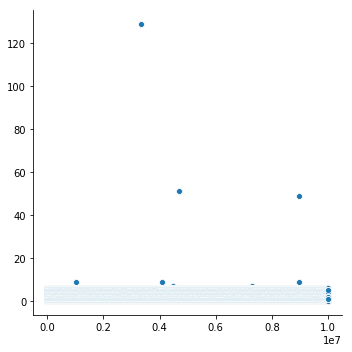

In [26]:
sns.relplot(data = train_set['passenger_count'])

In [27]:
train_set['pickup_latitude'].describe()

count    9.999502e+06
mean     3.991946e+01
std      9.322427e+00
min     -3.492264e+03
25%      4.073491e+01
50%      4.075263e+01
75%      4.076712e+01
max      3.344459e+03
Name: pickup_latitude, dtype: float64

In [28]:
train_set[(train_set['pickup_latitude']<=-90) | (train_set['pickup_latitude']>=90)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
5686,2011-07-30 11:15:00.00000082,3.30,2011-07-30 11:15:00 UTC,-73.947235,401.083332,-73.951392,40.778927,1
150559,2012-08-03 07:43:00.000000176,25.30,2012-08-03 07:43:00 UTC,0.000000,-3116.285383,-73.953600,40.787998,1
174356,2011-11-21 21:36:00.00000081,9.70,2011-11-21 21:36:00 UTC,2140.601160,1703.092772,-1251.195890,-1189.615440,1
272439,2011-04-23 02:55:00.00000012,9.30,2011-04-23 02:55:00 UTC,-74.002497,405.350000,-73.978600,40.739962,1
436233,2012-03-11 01:56:00.000000100,4.10,2012-03-11 01:56:00 UTC,-2986.242495,-880.627428,-3383.296608,-2559.748913,1
464025,2012-03-05 20:58:00.0000009,6.90,2012-03-05 20:58:00 UTC,-73.994268,404.966667,-73.973857,40.755457,1
505229,2012-03-05 21:08:00.0000006,9.30,2012-03-05 21:08:00 UTC,-73.994268,404.966667,-73.986387,40.776895,1
505583,2012-03-16 08:13:00.000000272,8.50,2012-03-16 08:13:00 UTC,-73.994277,405.133332,-73.956763,40.783737,1
543001,2011-10-28 13:53:00.000000178,5.30,2011-10-28 13:53:00 UTC,-3377.680935,-113.019497,-554.918693,314.794180,1
688685,2012-03-22 21:40:00.000000188,17.30,2012-03-22 21:40:00 UTC,2522.271325,2621.628430,-1718.117653,-2864.471003,1


In [29]:
train_set = train_set.drop((train_set[(train_set['pickup_latitude']<-90) | (train_set['pickup_latitude']>90)]).index, axis=0)

In [30]:
train_set = train_set.drop((train_set[(train_set['pickup_longitude']<-180) | (train_set['pickup_longitude']>180)]).index, axis=0)

In [31]:
train_set = train_set.drop((train_set[(train_set['dropoff_latitude']<-90) | (train_set['dropoff_latitude']>90)]).index, axis=0)

In [32]:
train_set = train_set.drop((train_set[(train_set['dropoff_longitude']<-180) | (train_set['dropoff_longitude']>180)]).index, axis=0)

In [33]:
train_set.shape

(9999026, 8)

In [34]:
train_set.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [35]:
import matplotlib.pyplot as plot

In [23]:
# Where to save the figures
import os
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Saving figure attribute_histogram_plots


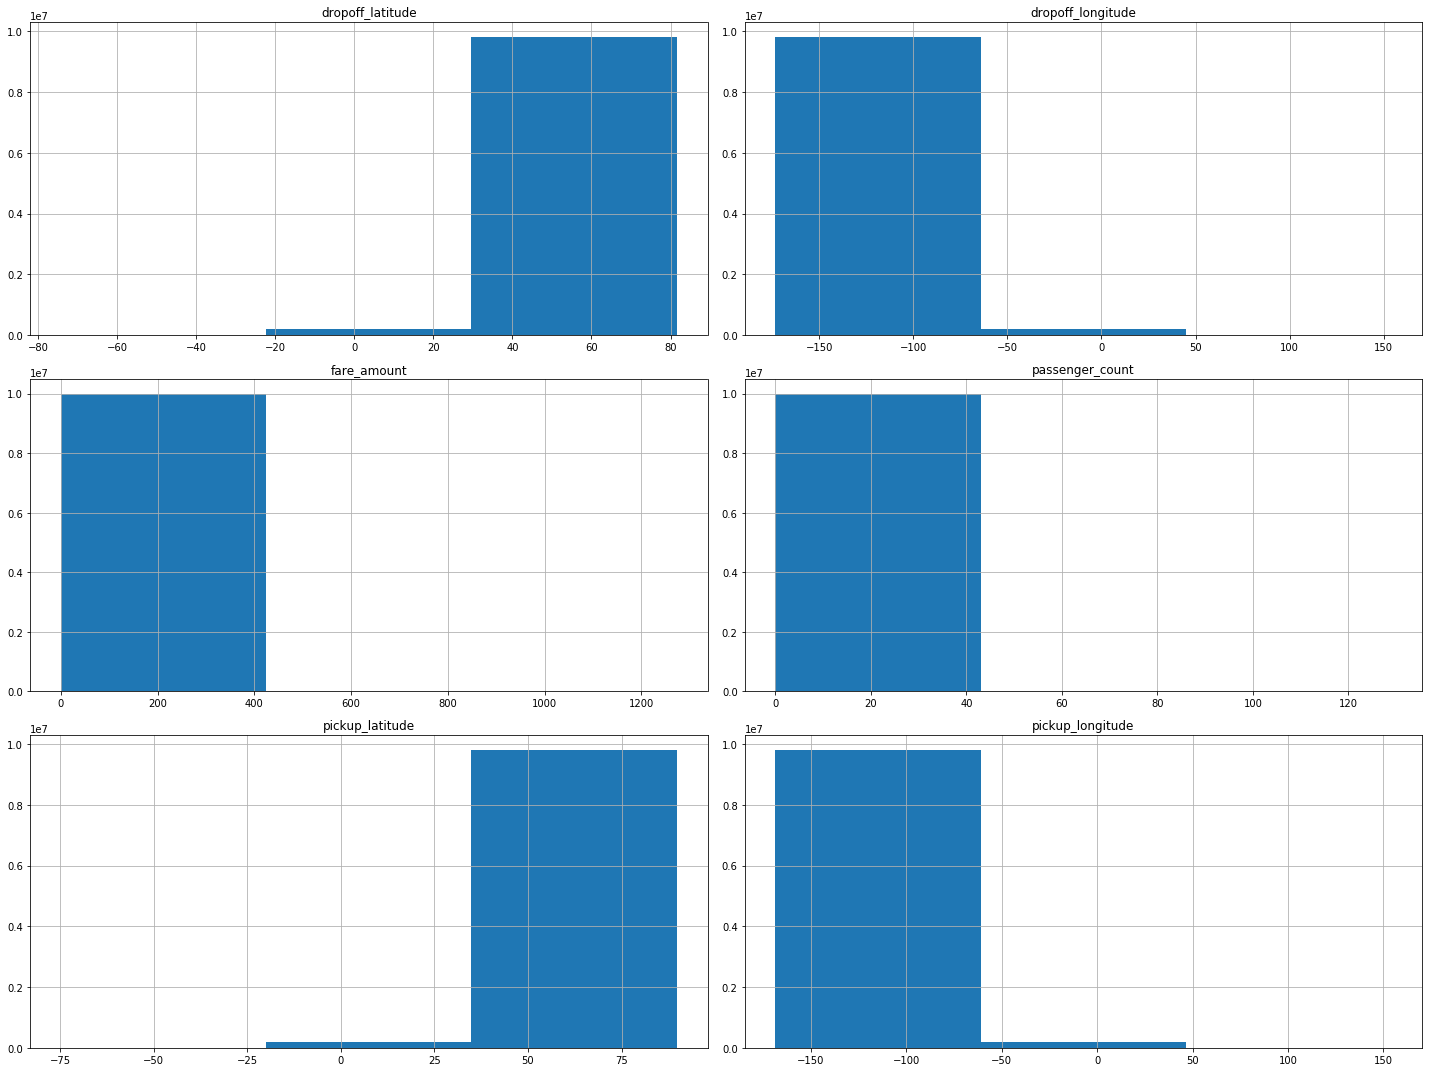

In [37]:
train_set.hist(bins=3, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

Saving figure bad_visualization_plot


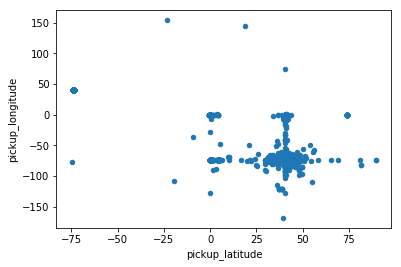

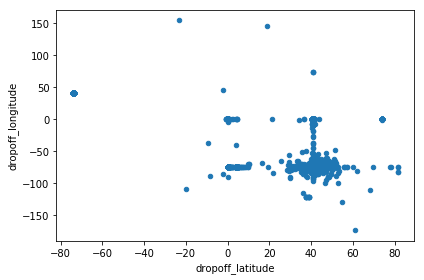

In [38]:
train_set.plot(kind="scatter", x="pickup_latitude", y="pickup_longitude")
train_set.plot(kind="scatter", x="dropoff_latitude", y="dropoff_longitude")
save_fig("bad_visualization_plot")

Saving figure better_visualization_plot
Saving figure better_visualization_plot_1


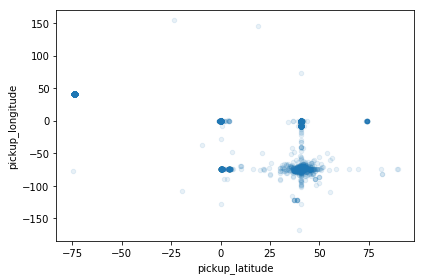

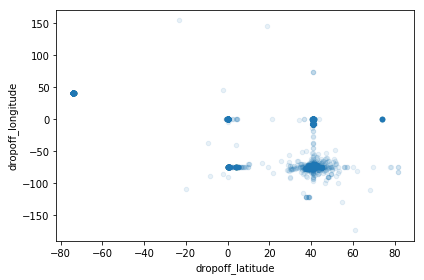

In [39]:
train_set.plot(kind="scatter", x="pickup_latitude", y="pickup_longitude", alpha=0.1)
save_fig("better_visualization_plot")
train_set.plot(kind="scatter", x="dropoff_latitude", y="dropoff_longitude", alpha = 0.1)
save_fig("better_visualization_plot_1")

AttributeError: 'str' object has no attribute 'shape'

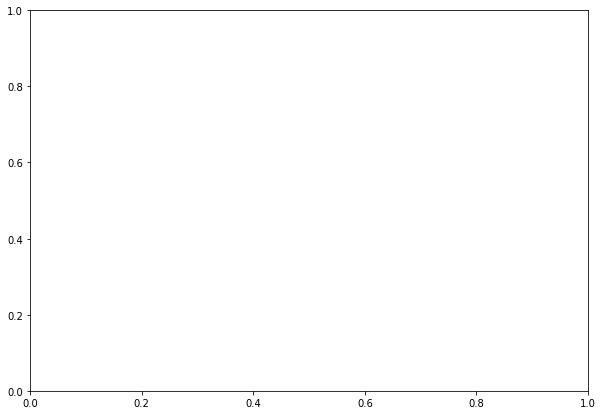

In [40]:
#train_set.plot(kind="scatter", x="pickup_longitude", y="pickup_latitude", alpha=0.4,
 #   s=train_set["fare_amount"]/10, label="pax", figsize=(10,7),
  #  c="median_pax_value", cmap=plt.get_cmap("jet"), colorbar=True,
   # sharex=False)
#plt.legend()
#save_fig("pax_scatterplot")

In [41]:
train_set.plot.scatter(data = train_set['passenger_count'], colormap = 'viridis' )

TypeError: scatter() missing 2 required positional arguments: 'x' and 'y'

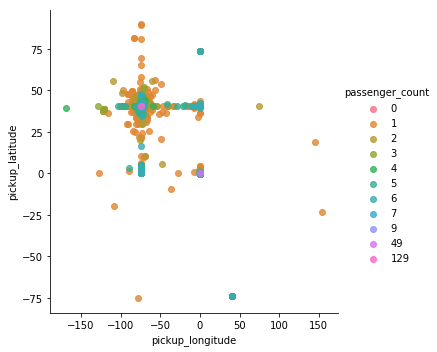

In [42]:
sns.lmplot( x="pickup_longitude", y="pickup_latitude", data=train_set, fit_reg=False, hue='passenger_count', legend=True)

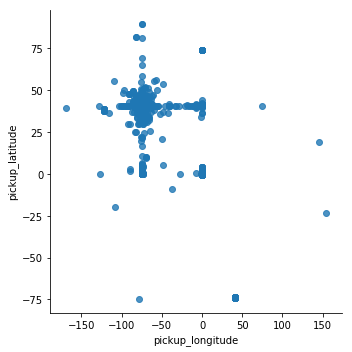

In [43]:
sns.lmplot( x="pickup_longitude", y="pickup_latitude", data=train_set, fit_reg=False, legend=True)

Saving figure Newyork_pickup_locations_scatter_plot


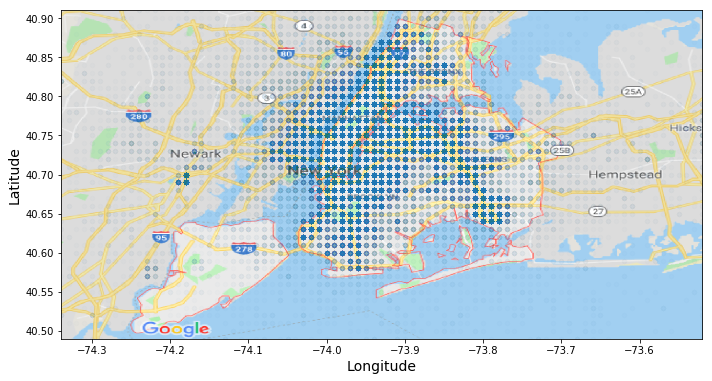

In [44]:
import matplotlib.image as mpimg
newyork_imp=mpimg.imread(PROJECT_ROOT_DIR + '/images/newyork_scape.png')
train_set1 = train_set.round({'pickup_longitude':2 , 'pickup_latitude':2})

ax = train_set1.plot(kind="scatter", x="pickup_longitude", y="pickup_latitude", figsize=(10,7),
                        alpha=0.01 )


#ax = sns.lmplot( x="pickup_longitude", y="pickup_latitude", data=train_set, fit_reg=False, hue='passenger_count', legend=True)

plt.imshow(newyork_imp, extent=[-74.34, -73.52, 40.49, 40.91], alpha=0.9)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
save_fig("Newyork_pickup_locations_scatter_plot")
plt.show()


In [45]:
train_set1 = train_set.round({'pickup_longitude':2 , 'pickup_latitude':2})

In [46]:
train_set1

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.84,40.72,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.02,40.71,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.98,40.76,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.99,40.73,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.97,40.77,-73.956655,40.783762,1
5,2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45 UTC,-74.00,40.73,-73.972892,40.758233,1
6,2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00 UTC,-73.98,40.75,-73.973802,40.764842,1
7,2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00 UTC,-73.95,40.77,-73.990095,40.751048,1
8,2012-12-03 13:10:00.000000125,9.0,2012-12-03 13:10:00 UTC,-74.01,40.73,-73.993078,40.731628,1
9,2009-09-02 01:11:00.00000083,8.9,2009-09-02 01:11:00 UTC,-73.98,40.73,-73.991540,40.758138,2


In [47]:
train_set.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [48]:
train_set['pickup_latitude'].round(2)

0          40.72
1          40.71
2          40.76
3          40.73
4          40.77
5          40.73
6          40.75
7          40.77
8          40.73
9          40.73
10         40.74
11          0.00
12         40.74
13         40.73
14         40.74
15          0.00
16         40.76
17         40.74
18         40.78
19         40.75
20         40.75
21         40.78
22         40.77
23         40.75
24         40.76
25         40.75
26          0.00
27         40.76
28         40.69
29         40.74
           ...  
9999970    40.71
9999971    40.74
9999972    40.76
9999973    40.75
9999974    40.77
9999975    40.74
9999976    40.77
9999977    40.74
9999978    40.77
9999979    40.78
9999980    40.76
9999981    40.63
9999982    40.79
9999983    40.75
9999984    40.76
9999985    40.76
9999986    40.75
9999987    40.77
9999988    40.76
9999989    40.72
9999990    40.76
9999991    40.64
9999992    40.78
9999993    40.74
9999994    40.73
9999995    40.73
9999996    40.76
9999997    40.

In [12]:
train_set['key'] = pd.to_datetime(train_set['key']) 
train_set['pickup_datetime'] = pd.to_datetime(train_set['pickup_datetime']) 

In [50]:
train_set.dtypes

key                  datetime64[ns]
fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
dtype: object

Saving figure Newyork_dropoff_locations_scatter_plot


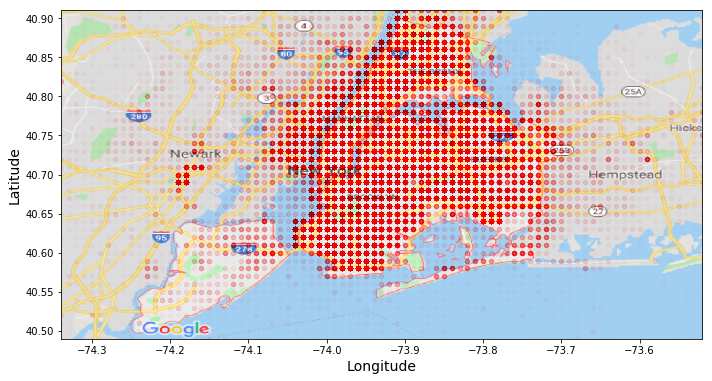

In [51]:
newyork_imp=mpimg.imread(PROJECT_ROOT_DIR + '/images/newyork_scape.png')
train_set1 = train_set.round({'dropoff_longitude':2 , 'dropoff_latitude':2})

ax = train_set1.plot(kind="scatter", x="dropoff_longitude", y="dropoff_latitude", figsize=(10,7),
                        alpha=0.01,color = 'r')


#ax = sns.lmplot( x="pickup_longitude", y="pickup_latitude", data=train_set, fit_reg=False, hue='passenger_count', legend=True)

plt.imshow(newyork_imp, extent=[-74.34, -73.52, 40.49, 40.91], alpha=0.9)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
save_fig("Newyork_dropoff_locations_scatter_plot")
plt.show()

In [52]:
train_set1.to_csv('rounded_lat_and_long_proximities.csv',index=False)

In [53]:
train_set.to_csv('truncated_values_1M.csv', index=False)

In [2]:
train_set = pd.read_csv("truncated_values_1M.csv")

In [3]:
test_set = pd.read_csv("test.csv")

In [3]:
train_set

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.000000100,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.000000200,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.000000490,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.000000100,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1
5,2011-01-06 09:50:45.000000200,12.1,2011-01-06 09:50:45,-74.000964,40.731630,-73.972892,40.758233,1
6,2012-11-20 20:35:00.000000100,7.5,2012-11-20 20:35:00,-73.980002,40.751662,-73.973802,40.764842,1
7,2012-01-04 17:22:00.000000810,16.5,2012-01-04 17:22:00,-73.951300,40.774138,-73.990095,40.751048,1
8,2012-12-03 13:10:00.000000125,9.0,2012-12-03 13:10:00,-74.006462,40.726713,-73.993078,40.731628,1
9,2009-09-02 01:11:00.000000830,8.9,2009-09-02 01:11:00,-73.980658,40.733873,-73.991540,40.758138,2


In [4]:
def haversine_distance(lat1, long1, lat2, long2):
    data = [train_set, test_set]
    for i in data:
        R = 6371  #radius of earth in kilometers
        #R = 3959 #radius of earth in miles
        phi1 = np.radians(i[lat1])
        phi2 = np.radians(i[lat2])
    
        delta_phi = np.radians(i[lat2]-i[lat1])
        delta_lambda = np.radians(i[long2]-i[long1])
    
        #a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)
        a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0) ** 2
    
        #c = 2 * atan2( √a, √(1−a) )
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    
        #d = R*c
        d = (R * c) #in kilometers
        i['H_Distance'] = d
    return d

In [5]:
haversine_distance('pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude')

0        2.323260
1        2.425353
2        0.618628
3        1.961033
4        5.387301
5        3.222549
6        0.929601
7       21.540102
8        3.873962
9        1.099794
10       2.317685
11       4.819179
12       0.722670
13       1.675503
14       2.504032
15       5.115375
16       0.298838
17       2.531147
18       0.780444
19       0.427282
20       1.651946
21       1.969211
22       1.305441
23       1.901295
24       5.779720
25       1.121687
26      14.306540
27       9.427870
28       1.144529
29       4.696371
          ...    
9884    15.119293
9885     5.006239
9886     7.376754
9887     1.680721
9888     0.000000
9889     2.377723
9890     2.944581
9891     5.952839
9892     2.950361
9893     4.735375
9894     3.101361
9895     9.000325
9896     2.398161
9897     5.081663
9898     0.555287
9899     5.610506
9900     1.890608
9901     1.530118
9902     3.891525
9903     2.299316
9904    15.091263
9905     9.613797
9906     0.369506
9907     9.923999
9908     1

In [6]:
train_set['H_Distance'].head()

0    1.030764
1    8.450134
2    1.389525
3    2.799270
4    1.999157
Name: H_Distance, dtype: float64

In [7]:
test_set['H_Distance'].head()

0    2.323260
1    2.425353
2    0.618628
3    1.961033
4    5.387301
Name: H_Distance, dtype: float64

In [8]:
train_set

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance
0,2009-06-15 17:26:21.000000100,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,1.030764
1,2010-01-05 16:52:16.000000200,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,8.450134
2,2011-08-18 00:35:00.000000490,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,1.389525
3,2012-04-21 04:30:42.000000100,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,2.799270
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,1.999157
5,2011-01-06 09:50:45.000000200,12.1,2011-01-06 09:50:45,-74.000964,40.731630,-73.972892,40.758233,1,3.787239
6,2012-11-20 20:35:00.000000100,7.5,2012-11-20 20:35:00,-73.980002,40.751662,-73.973802,40.764842,1,1.555807
7,2012-01-04 17:22:00.000000810,16.5,2012-01-04 17:22:00,-73.951300,40.774138,-73.990095,40.751048,1,4.155444
8,2012-12-03 13:10:00.000000125,9.0,2012-12-03 13:10:00,-74.006462,40.726713,-73.993078,40.731628,1,1.253232
9,2009-09-02 01:11:00.000000830,8.9,2009-09-02 01:11:00,-73.980658,40.733873,-73.991540,40.758138,2,2.849627


In [16]:
data = [train_set,test_set]
for i in data:
    i['Year']= i['pickup_datetime'].dt.year
    i['Month']=i['pickup_datetime'].dt.month
    i['Date']=i['pickup_datetime'].dt.day
    i['Day of Week'] = i['pickup_datetime'].dt.dayofweek
    i['Hour']=i['pickup_datetime'].dt.hour

In [15]:
test_set.dtypes
train_set.dtypes

key                  datetime64[ns]
fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
H_Distance                  float64
Year                          int64
Month                         int64
Date                          int64
Day of Week                   int64
Hour                          int64
dtype: object

In [14]:
test_set['key']=pd.to_datetime(test_set['key'])
train_set['key']=pd.to_datetime(train_set['key'])
test_set['pickup_datetime']=pd.to_datetime(test_set['pickup_datetime'])
train_set['pickup_datetime']=pd.to_datetime(train_set['pickup_datetime'])

In [ ]:
train_set.head()

In [ ]:
test_set.head()

NameError: name 'save_fig' is not defined

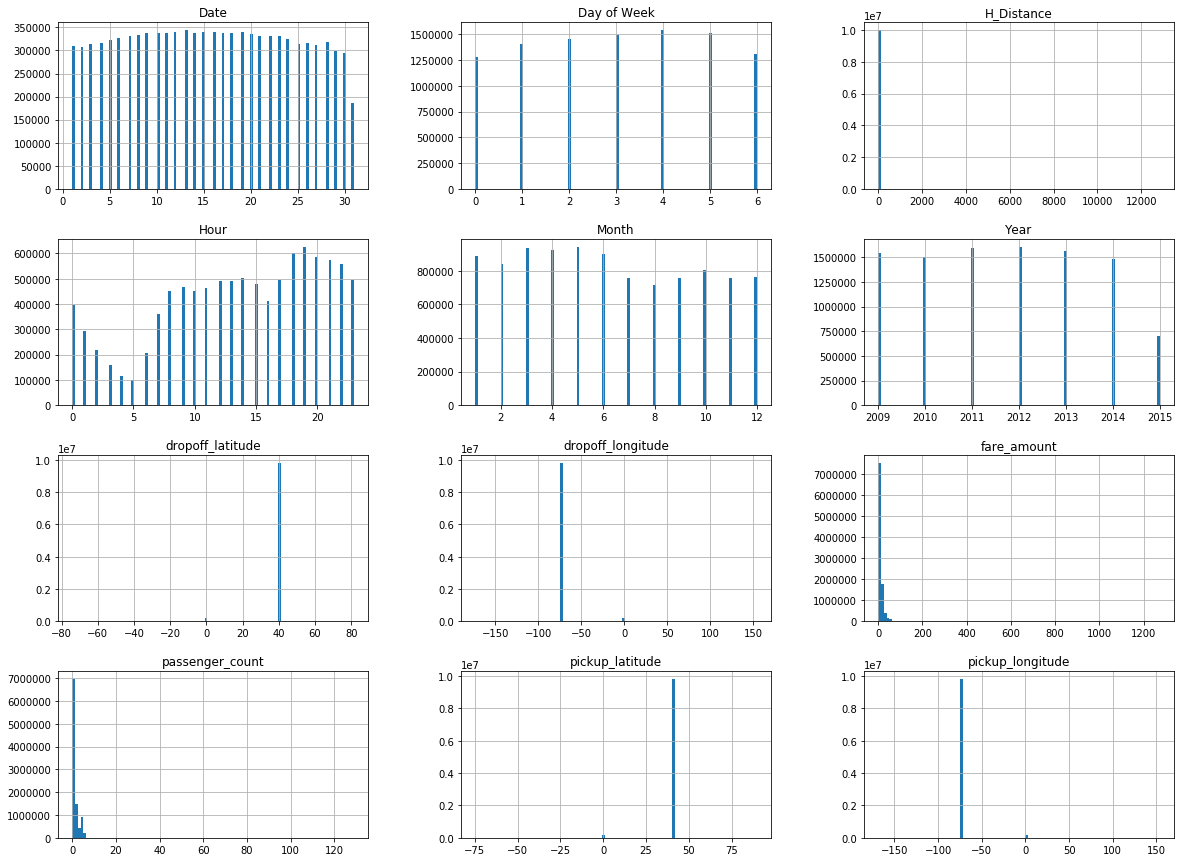

In [17]:
train_set.hist(bins=100, figsize=(20,15))
save_fig("complete_plots")
plt.show()

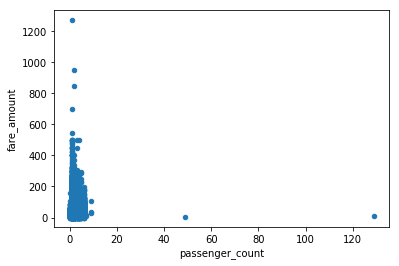

In [18]:
train_set.plot(kind="scatter", x="passenger_count", y="fare_amount")


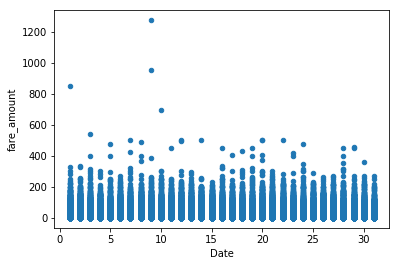

In [19]:
train_set.plot(kind="scatter", x = 'Date', y = 'fare_amount' )

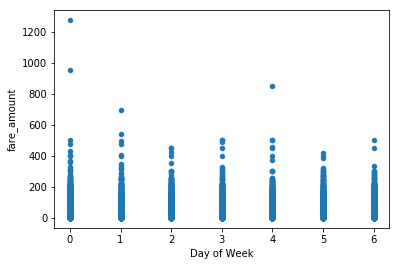

In [20]:
train_set.plot(kind="scatter", x = 'Day of Week', y = 'fare_amount' )

In [21]:
bins_0 = train_set.loc[(train_set['H_Distance']==0),['H_Distance']]
bins_1 = train_set.loc[(train_set['H_Distance']>0) & (train_set['H_Distance']<= 10),['H_Distance']]
bins_2 = train_set.loc[(train_set['H_Distance']>10)& (train_set['H_Distance']<= 50),['H_Distance']]
bins_3 = train_set.loc[(train_set['H_Distance']>50)& (train_set['H_Distance']<= 100),['H_Distance']]
bins_4 = train_set.loc[(train_set['H_Distance']>100) & (train_set['H_Distance']<= 200),['H_Distance']]
bins_5 = train_set.loc[(train_set['H_Distance']>200) & (train_set['H_Distance']<= 300),['H_Distance']]
bins_6 = train_set.loc[(train_set['H_Distance']>300),['H_Distance']]
bins_0['bins']='0'
bins_1['bins']='0-10'
bins_2['bins']='11-50'
bins_3['bins']='51-100'
bins_4['bins']='100-200'
bins_5['bins']='201-300'
bins_6['bins']='>300'
dist_bins = pd.concat([bins_0,bins_1,bins_2,bins_3,bins_4,bins_5,bins_6])
dist_bins.columns


Index(['H_Distance', 'bins'], dtype='object')

NameError: name 'save_fig' is not defined

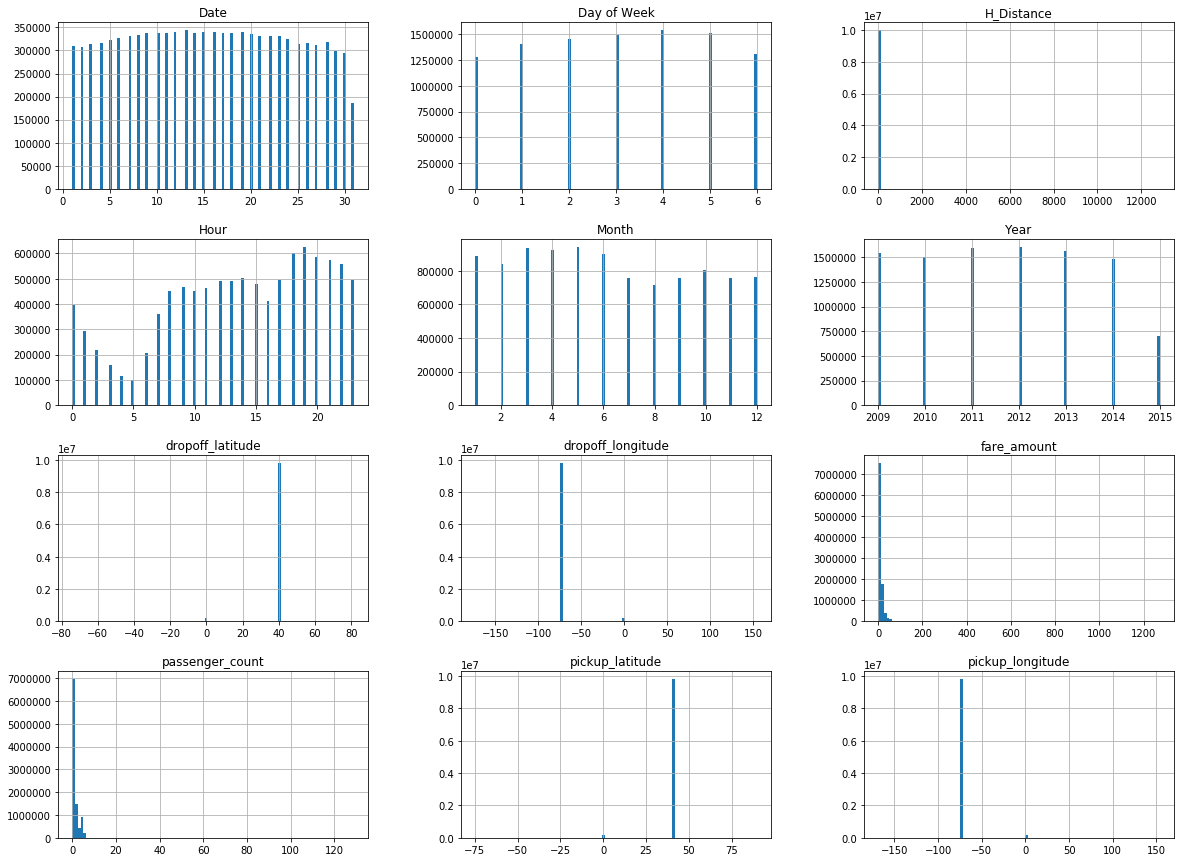

In [22]:
train_set.hist(bins=100, figsize=(20,15))
save_fig("complete_plots_2.0")
plt.show()

In [23]:
#pickup latitude and longitude = 0
train_set.loc[((train_set['pickup_latitude']==0) & (train_set['pickup_longitude']==0))&((train_set['dropoff_latitude']!=0) & (train_set['dropoff_longitude']!=0)) & (train_set['fare_amount']==0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
897129,2015-04-08 00:47:30.000000100,0.0,2015-04-08 00:47:30,0.0,0.0,-73.937698,40.758118,1,8662.340373,2015,4,8,2,0
1833375,2015-05-01 01:49:29.000000300,0.0,2015-05-01 01:49:29,0.0,0.0,-74.001106,40.752079,1,8667.465942,2015,5,1,4,1
6953493,2015-05-21 01:01:31.000000300,0.0,2015-05-21 01:01:31,0.0,0.0,-74.044327,40.789059,1,8671.799330,2015,5,21,3,1
9376510,2015-05-14 22:07:05.000000110,0.0,2015-05-14 22:07:05,0.0,0.0,-73.975113,40.717560,1,8664.606742,2015,5,14,3,22


In [24]:
train_set = train_set.drop(train_set.loc[((train_set['pickup_latitude']==0) & (train_set['pickup_longitude']==0))&((train_set['dropoff_latitude']!=0) & (train_set['dropoff_longitude']!=0)) & (train_set['fare_amount']==0)].index, axis=0)

In [25]:
#dropoff latitude and longitude = 0
train_set.loc[((train_set['pickup_latitude']!=0) & (train_set['pickup_longitude']!=0))&((train_set['dropoff_latitude']==0) & (train_set['dropoff_longitude']==0)) & (train_set['fare_amount']==0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
930594,2015-03-21 21:27:02.000000200,0.0,2015-03-21 21:27:02,-73.982101,40.770557,0.0,0.0,2,8666.270974,2015,3,21,5,21
942129,2015-03-22 00:36:37.000000900,0.0,2015-03-22 00:36:37,-73.952240,40.749435,0.0,0.0,1,8663.365938,2015,3,22,6,0
949478,2015-04-28 11:18:39.000000400,0.0,2015-04-28 11:18:39,-73.996246,40.748653,0.0,0.0,1,8666.993460,2015,4,28,1,11
1201862,2015-06-20 02:57:04.000000200,0.0,2015-06-20 02:57:04,-74.004311,40.742542,0.0,0.0,1,8667.536216,2015,6,20,5,2
1239412,2015-05-03 23:22:38.000000100,0.0,2015-05-03 23:22:38,-73.790138,40.643627,0.0,0.0,1,8647.756537,2015,5,3,6,23
1380729,2015-03-25 01:14:37.000000100,0.0,2015-03-25 01:14:37,-73.937645,40.758244,0.0,0.0,1,8662.338538,2015,3,25,2,1
1634466,2013-08-06 23:11:41.000000400,0.0,2013-08-06 23:11:41,-73.993769,40.720913,0.0,0.0,1,8666.220774,2013,8,6,1,23
1729808,2015-06-08 05:19:21.000000200,0.0,2015-06-08 05:19:21,-73.984421,40.728683,0.0,0.0,1,8665.605456,2015,6,8,0,5
2758290,2015-05-30 03:23:01.000000200,0.0,2015-05-30 03:23:01,-74.002304,40.708973,0.0,0.0,1,8666.683730,2015,5,30,5,3
3463755,2015-06-09 20:31:04.000000600,0.0,2015-06-09 20:31:04,-73.967117,40.766876,0.0,0.0,1,8664.955274,2015,6,9,1,20


In [26]:
train_set = train_set.drop(train_set.loc[((train_set['pickup_latitude']!=0) & (train_set['pickup_longitude']!=0))&((train_set['dropoff_latitude']==0) & (train_set['dropoff_longitude']==0)) & (train_set['fare_amount']==0)].index, axis=0)

In [27]:
test_set.loc[((test_set['pickup_latitude']!=0) & (test_set['pickup_longitude']!=0))&((test_set['dropoff_latitude']==0) & (test_set['dropoff_longitude']==0))]

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour


In [28]:
high_distance = train_set.loc[(train_set['H_Distance']>200)&(train_set['fare_amount']!=0)]

In [29]:
high_distance

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
472,2009-02-22 22:48:00.000000130,2.50,2009-02-22 22:48:00,0.000000,0.000000,-74.005433,40.726685,2,8667.304968,2009,2,22,6,22
1260,2011-03-10 20:25:00.000000490,5.70,2011-03-10 20:25:00,-73.973907,40.754743,0.000000,0.000000,2,8665.268588,2011,3,10,3,20
2279,2011-08-29 08:24:00.000000107,8.90,2011-08-29 08:24:00,-73.936667,40.757815,0.000000,40.757815,1,6026.494216,2011,8,29,0,8
2396,2012-06-24 17:11:10.000000100,45.00,2012-06-24 17:11:10,0.000000,0.000000,-74.010230,40.714553,2,8667.454421,2012,6,24,6,17
4276,2015-04-07 23:33:02.000000500,7.00,2015-04-07 23:33:02,-73.972702,40.757423,0.000000,0.000000,1,8665.223767,2015,4,7,1,23
4595,2010-03-30 07:12:00.000000158,6.90,2010-03-30 07:12:00,0.000000,0.000000,-73.989693,40.754280,1,8666.566030,2010,3,30,1,7
5861,2012-03-04 01:35:00.000000173,8.50,2012-03-04 01:35:00,-73.995030,40.744945,-7.986640,40.729937,1,5420.988959,2012,3,4,6,1
6185,2014-07-28 15:04:00.000000280,15.50,2014-07-28 15:04:00,0.000000,0.000000,-73.952980,40.786670,5,8664.191488,2014,7,28,0,15
6299,2015-02-27 16:18:58.000000400,16.50,2015-02-27 16:18:58,0.000000,0.000000,-73.936600,40.796543,1,8663.039123,2015,2,27,4,16
7011,2011-06-18 04:03:00.000000830,4.50,2011-06-18 04:03:00,-73.988980,40.721697,-74.001073,0.728087,3,4447.086698,2011,6,18,5,4


In [30]:
high_distance.shape

(20391, 14)

In [31]:
high_distance['H_Distance'] = high_distance.apply(
    lambda row: (row['fare_amount'] - 2.50)/1.56,
    axis=1
)

/Users/sarathchandra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [32]:
high_distance

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
472,2009-02-22 22:48:00.000000130,2.50,2009-02-22 22:48:00,0.000000,0.000000,-74.005433,40.726685,2,0.000000,2009,2,22,6,22
1260,2011-03-10 20:25:00.000000490,5.70,2011-03-10 20:25:00,-73.973907,40.754743,0.000000,0.000000,2,2.051282,2011,3,10,3,20
2279,2011-08-29 08:24:00.000000107,8.90,2011-08-29 08:24:00,-73.936667,40.757815,0.000000,40.757815,1,4.102564,2011,8,29,0,8
2396,2012-06-24 17:11:10.000000100,45.00,2012-06-24 17:11:10,0.000000,0.000000,-74.010230,40.714553,2,27.243590,2012,6,24,6,17
4276,2015-04-07 23:33:02.000000500,7.00,2015-04-07 23:33:02,-73.972702,40.757423,0.000000,0.000000,1,2.884615,2015,4,7,1,23
4595,2010-03-30 07:12:00.000000158,6.90,2010-03-30 07:12:00,0.000000,0.000000,-73.989693,40.754280,1,2.820513,2010,3,30,1,7
5861,2012-03-04 01:35:00.000000173,8.50,2012-03-04 01:35:00,-73.995030,40.744945,-7.986640,40.729937,1,3.846154,2012,3,4,6,1
6185,2014-07-28 15:04:00.000000280,15.50,2014-07-28 15:04:00,0.000000,0.000000,-73.952980,40.786670,5,8.333333,2014,7,28,0,15
6299,2015-02-27 16:18:58.000000400,16.50,2015-02-27 16:18:58,0.000000,0.000000,-73.936600,40.796543,1,8.974359,2015,2,27,4,16
7011,2011-06-18 04:03:00.000000830,4.50,2011-06-18 04:03:00,-73.988980,40.721697,-74.001073,0.728087,3,1.282051,2011,6,18,5,4


In [33]:
train_set.update(high_distance)

In [34]:
train_set.shape

(9998991, 14)

In [35]:
train_set[train_set['H_Distance']==0]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
11,2012-12-24 11:24:00.000000980,5.50,2012-12-24 11:24:00,0.000000,0.000000,0.000000,0.000000,3.0,0.0,2012.0,12.0,24.0,0.0,11.0
15,2013-11-23 12:57:00.000000190,5.00,2013-11-23 12:57:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2013.0,11.0,23.0,5.0,12.0
26,2011-02-07 20:01:00.000000114,6.50,2011-02-07 20:01:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2011.0,2.0,7.0,0.0,20.0
105,2009-03-25 00:08:52.000000100,52.00,2009-03-25 00:08:52,-74.035839,40.747320,-74.035839,40.747320,1.0,0.0,2009.0,3.0,25.0,2.0,0.0
124,2013-01-17 17:22:00.000000430,8.00,2013-01-17 17:22:00,0.000000,0.000000,0.000000,0.000000,2.0,0.0,2013.0,1.0,17.0,3.0,17.0
191,2014-01-08 21:55:58.000000600,6.50,2014-01-08 21:55:58,-73.998488,40.726303,-73.998488,40.726303,1.0,0.0,2014.0,1.0,8.0,2.0,21.0
192,2010-09-05 17:08:00.000000920,3.70,2010-09-05 17:08:00,0.000000,0.000000,0.000000,0.000000,5.0,0.0,2010.0,9.0,5.0,6.0,17.0
233,2011-07-24 01:14:35.000000200,8.50,2011-07-24 01:14:35,0.000000,0.000000,0.000000,0.000000,2.0,0.0,2011.0,7.0,24.0,6.0,1.0
270,2012-08-25 01:53:42.000000500,7.50,2012-08-25 01:53:42,-73.995892,40.746454,-73.995892,40.746454,1.0,0.0,2012.0,8.0,25.0,5.0,1.0
273,2009-10-30 18:13:00.000000210,8.10,2009-10-30 18:13:00,0.000000,0.000000,0.000000,0.000000,4.0,0.0,2009.0,10.0,30.0,4.0,18.0


In [36]:
train_set[(train_set['H_Distance']==0)&(train_set['fare_amount']==0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
105038,2013-08-21 21:41:00.000000215,0.0,2013-08-21 21:41:00,0.000000,0.000000,0.000000,0.000000,2.0,0.0,2013.0,8.0,21.0,2.0,21.0
331567,2013-08-05 06:45:54.000000500,0.0,2013-08-05 06:45:54,-73.982354,40.679971,-73.982354,40.679971,1.0,0.0,2013.0,8.0,5.0,0.0,6.0
436619,2015-03-04 22:33:39.000000800,0.0,2015-03-04 22:33:39,-74.043442,40.788208,-74.043442,40.788208,1.0,0.0,2015.0,3.0,4.0,2.0,22.0
689186,2015-05-27 23:10:03.000000400,0.0,2015-05-27 23:10:03,-73.994125,40.741131,-73.994125,40.741131,1.0,0.0,2015.0,5.0,27.0,2.0,23.0
1221328,2015-02-02 21:58:28.000000300,0.0,2015-02-02 21:58:28,0.000000,0.000000,0.000000,0.000000,2.0,0.0,2015.0,2.0,2.0,0.0,21.0
1597912,2013-08-06 11:12:00.000000480,0.0,2013-08-06 11:12:00,0.000000,0.000000,0.000000,0.000000,2.0,0.0,2013.0,8.0,6.0,1.0,11.0
1662390,2010-03-13 02:39:29.000000100,0.0,2010-03-13 02:39:29,-74.035278,40.738683,-74.035278,40.738683,2.0,0.0,2010.0,3.0,13.0,5.0,2.0
2214306,2010-02-03 11:44:07.000000200,0.0,2010-02-03 11:44:07,-74.014147,40.710546,-74.014147,40.710546,1.0,0.0,2010.0,2.0,3.0,2.0,11.0
2329301,2015-02-19 09:43:11.000000700,0.0,2015-02-19 09:43:11,-73.953857,40.813251,-73.953857,40.813251,1.0,0.0,2015.0,2.0,19.0,3.0,9.0
2581188,2015-05-07 19:12:43.000000500,0.0,2015-05-07 19:12:43,-73.913727,40.779018,-73.913727,40.779018,1.0,0.0,2015.0,5.0,7.0,3.0,19.0


In [37]:
train_set = train_set.drop(train_set[(train_set['H_Distance']==0)&(train_set['fare_amount']==0)].index, axis = 0)

In [38]:
#4 rows dropped
train_set[(train_set['H_Distance']==0)].shape

(287479, 14)

In [39]:
#Between 6AM and 8PM on Mon-Fri
rush_hour = train_set.loc[(((train_set['Hour']>=6)&(train_set['Hour']<=20)) & ((train_set['Day of Week']>=1) & (train_set['Day of Week']<=5)) & (train_set['H_Distance']==0) & (train_set['fare_amount'] < 2.5))]
rush_hour

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
830543,2015-01-21 06:29:21.000000600,0.01,2015-01-21 06:29:21,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2015.0,1.0,21.0,2.0,6.0
925807,2015-01-21 14:12:00.000000400,1.90,2015-01-21 14:12:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2015.0,1.0,21.0,2.0,14.0
1112095,2015-03-25 14:55:38.000000200,1.60,2015-03-25 14:55:38,0.000000,0.000000,0.000000,0.000000,2.0,0.0,2015.0,3.0,25.0,2.0,14.0
1215247,2015-05-29 18:15:27.000000600,2.00,2015-05-29 18:15:27,-73.903214,40.747318,-73.903214,40.747318,1.0,0.0,2015.0,5.0,29.0,4.0,18.0
2097192,2013-08-30 15:11:00.000000143,0.50,2013-08-30 15:11:00,-121.340000,38.903350,-121.340000,38.903350,1.0,0.0,2013.0,8.0,30.0,4.0,15.0
2321871,2010-02-25 12:44:00.000000125,1.25,2010-02-25 12:44:00,-73.937722,40.758318,-73.937722,40.758318,5.0,0.0,2010.0,2.0,25.0,3.0,12.0
2949635,2015-01-22 13:34:00.000000300,2.00,2015-01-22 13:34:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2015.0,1.0,22.0,3.0,13.0
3010069,2015-01-23 08:50:38.000000600,0.01,2015-01-23 08:50:38,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2015.0,1.0,23.0,4.0,8.0
4112131,2015-04-15 20:12:10.000000500,0.01,2015-04-15 20:12:10,-73.994553,40.750240,-73.994553,40.750240,1.0,0.0,2015.0,4.0,15.0,2.0,20.0
4919949,2013-08-09 18:39:00.000000201,1.50,2013-08-09 18:39:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2013.0,8.0,9.0,4.0,18.0


In [40]:
train_set=train_set.drop(rush_hour.index, axis=0)
train_set.shape

(9998922, 14)

In [41]:
#Between 8PM and 6AM on Mon-Fri
non_rush_hour = train_set.loc[(((train_set['Hour']<6)|(train_set['Hour']>20)) & ((train_set['Day of Week']>=1)&(train_set['Day of Week']<=5)) & (train_set['H_Distance']==0) & (train_set['fare_amount'] < 3.0))]
#print(Counter(non_work_hours['Hour']))
#print(Counter(non_work_hours['Day of Week']))
non_rush_hour

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
376,2014-05-29 05:57:22.000000100,2.5,2014-05-29 05:57:22,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2014.0,5.0,29.0,3.0,5.0
503,2010-01-19 01:10:00.000000120,2.5,2010-01-19 01:10:00,-73.998720,40.624708,-73.998720,40.624708,1.0,0.0,2010.0,1.0,19.0,1.0,1.0
657,2009-08-25 01:50:21.000000100,2.5,2009-08-25 01:50:21,-73.986410,40.763350,-73.986410,40.763350,1.0,0.0,2009.0,8.0,25.0,1.0,1.0
3166,2012-07-06 22:07:00.000000111,2.5,2012-07-06 22:07:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2012.0,7.0,6.0,4.0,22.0
12950,2010-07-23 03:30:08.000000100,2.9,2010-07-23 03:30:08,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2010.0,7.0,23.0,4.0,3.0
16070,2013-05-30 00:19:40.000000100,2.5,2013-05-30 00:19:40,-73.782520,40.644488,-73.782520,40.644488,1.0,0.0,2013.0,5.0,30.0,3.0,0.0
17858,2014-08-21 23:28:26.000000200,2.5,2014-08-21 23:28:26,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2014.0,8.0,21.0,3.0,23.0
18033,2009-01-07 22:16:00.000000172,2.5,2009-01-07 22:16:00,-73.992220,40.759068,-73.992220,40.759068,2.0,0.0,2009.0,1.0,7.0,2.0,22.0
24831,2015-02-27 02:23:09.000000400,2.5,2015-02-27 02:23:09,-73.983330,40.738205,-73.983330,40.738205,1.0,0.0,2015.0,2.0,27.0,4.0,2.0
29608,2009-06-17 03:14:11.000000100,2.5,2009-06-17 03:14:11,-73.934842,40.740996,-73.934842,40.740996,1.0,0.0,2009.0,6.0,17.0,2.0,3.0


In [42]:
#keep these. Since the fare_amount is not <2.5 (which is the base fare), these values seem legit to me.
#Saturday and Sunday all hours
weekends = train_set.loc[((train_set['Day of Week']==0) | (train_set['Day of Week']==6)) & (train_set['H_Distance']==0) & (train_set['fare_amount'] < 3.0)]
weekends

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
472,2009-02-22 22:48:00.000000130,2.50,2009-02-22 22:48:00,0.000000,0.000000,-74.005433,40.726685,2.0,0.0,2009.0,2.0,22.0,6.0,22.0
1419,2013-07-21 00:10:23.000000100,2.50,2013-07-21 00:10:23,-73.956556,40.779828,-73.956556,40.779828,1.0,0.0,2013.0,7.0,21.0,6.0,0.0
1774,2012-08-27 15:24:00.000000700,2.50,2012-08-27 15:24:00,-73.950282,40.701282,-73.950282,40.701282,1.0,0.0,2012.0,8.0,27.0,0.0,15.0
4365,2014-01-13 16:14:48.000000100,2.50,2014-01-13 16:14:48,-73.948410,40.744969,-73.948410,40.744969,1.0,0.0,2014.0,1.0,13.0,0.0,16.0
4952,2010-01-10 13:44:35.000000700,2.50,2010-01-10 13:44:35,-73.983934,40.754938,-73.983934,40.754938,1.0,0.0,2010.0,1.0,10.0,6.0,13.0
6294,2010-11-15 09:29:00.000000191,2.50,2010-11-15 09:29:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2010.0,11.0,15.0,0.0,9.0
9174,2010-12-06 11:48:34.000000500,2.50,2010-12-06 11:48:34,-73.946993,40.744583,-73.946993,40.744583,3.0,0.0,2010.0,12.0,6.0,0.0,11.0
9618,2015-03-01 22:39:54.000000100,2.50,2015-03-01 22:39:54,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2015.0,3.0,1.0,6.0,22.0
11590,2010-10-17 04:28:00.000000150,2.90,2010-10-17 04:28:00,-73.851972,40.679820,-73.851972,40.679820,5.0,0.0,2010.0,10.0,17.0,6.0,4.0
13567,2009-03-09 12:26:25.000000100,2.50,2009-03-09 12:26:25,-73.416169,40.784140,-73.416169,40.784140,1.0,0.0,2009.0,3.0,9.0,0.0,12.0


In [43]:
#Counter(weekends['Day of Week'])
#keep these too. Since the fare_amount is not <2.5, these values seem legit to me.
train_set.loc[(train_set['H_Distance']!=0) & (train_set['fare_amount']==0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
9999,2010-02-15 14:26:01.000000300,0.0,2010-02-15 14:26:01,-73.987115,40.738808,-74.005911,40.713960,1.0,3.184763,2010.0,2.0,15.0,0.0,14.0
27887,2015-05-15 21:40:28.000000100,0.0,2015-05-15 21:40:28,-74.077927,40.805714,-74.077919,40.805721,1.0,0.001064,2015.0,5.0,15.0,4.0,21.0
47295,2010-03-18 19:13:39.000000200,0.0,2010-03-18 19:13:39,-73.942346,40.806269,-73.942463,40.806129,1.0,0.018420,2010.0,3.0,18.0,3.0,19.0
175335,2014-06-29 16:04:29.000000200,0.0,2014-06-29 16:04:29,-73.484480,40.813401,-73.484442,40.813323,2.0,0.009244,2014.0,6.0,29.0,6.0,16.0
211435,2015-04-15 14:02:39.000000300,0.0,2015-04-15 14:02:39,-73.937378,40.758450,-73.937447,40.758450,1.0,0.005783,2015.0,4.0,15.0,2.0,14.0
211479,2010-03-08 18:22:00.000000760,0.0,2010-03-08 18:22:00,-73.937353,40.758227,-73.937358,40.758230,1.0,0.000537,2010.0,3.0,8.0,0.0,18.0
266462,2010-02-20 09:51:27.000000400,0.0,2010-02-20 09:51:27,-73.877376,40.772415,-73.877403,40.772391,1.0,0.003506,2010.0,2.0,20.0,5.0,9.0
386700,2015-05-08 07:02:38.000000100,0.0,2015-05-08 07:02:38,-73.999496,40.748787,-74.002556,40.744659,1.0,0.526370,2015.0,5.0,8.0,4.0,7.0
431781,2015-01-13 00:48:21.000000100,0.0,2015-01-13 00:48:21,-73.998383,40.759418,-74.031189,40.748924,1.0,2.999630,2015.0,1.0,13.0,1.0,0.0
489722,2015-02-14 21:06:53.000000700,0.0,2015-02-14 21:06:53,-73.949951,40.776215,-73.949959,40.776218,2.0,0.000770,2015.0,2.0,14.0,5.0,21.0


In [44]:

scenario_3 = train_set.loc[(train_set['H_Distance']!=0) & (train_set['fare_amount']==0)]
len(scenario_3)

187

In [45]:
#We do not have any distance values that are outliers.
scenario_3.sort_values('H_Distance', ascending=False)
scenario_3['fare_amount'] = scenario_3.apply(
    lambda row: ((row['H_Distance'] * 1.56) + 2.50), axis=1
)
scenario_3['fare_amount']


/Users/sarathchandra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


9999        7.468230
27887       2.501660
47295       2.528736
175335      2.514421
211435      2.509022
211479      2.500838
266462      2.505469
386700      3.321137
431781      7.179423
489722      2.501201
495228      2.500662
520666      3.157114
561733     19.524533
670192      2.500662
681279      2.501577
760590      3.034632
762730     25.597788
788394     28.034391
895281      3.369958
937934      2.501202
957504      2.505506
1104337    27.117942
1107520    40.420482
1155570     9.100196
1160458    29.457723
1160914     2.955397
1249632     3.162058
1289902     2.504680
1291009     2.937446
1295890     7.772359
             ...    
8756798     2.503524
8784516     3.945597
8786969    29.245946
8805047     4.804970
8829533     3.823287
8877198     2.520732
8895083     9.274595
8931702     2.500662
8951874     2.803393
8959601     4.054839
8993117     2.501004
9128501     4.553429
9182323     2.638730
9298553     3.373954
9298841    19.287356
9312208     2.501199
9329671    15

In [46]:
train_set.update(scenario_3)

In [47]:
train_set.shape

(9998922, 14)

In [48]:
train_set.loc[(train_set['H_Distance']==0) & (train_set['fare_amount']!=0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
11,2012-12-24 11:24:00.000000980,5.50,2012-12-24 11:24:00,0.000000,0.000000,0.000000,0.000000,3.0,0.0,2012.0,12.0,24.0,0.0,11.0
15,2013-11-23 12:57:00.000000190,5.00,2013-11-23 12:57:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2013.0,11.0,23.0,5.0,12.0
26,2011-02-07 20:01:00.000000114,6.50,2011-02-07 20:01:00,0.000000,0.000000,0.000000,0.000000,1.0,0.0,2011.0,2.0,7.0,0.0,20.0
105,2009-03-25 00:08:52.000000100,52.00,2009-03-25 00:08:52,-74.035839,40.747320,-74.035839,40.747320,1.0,0.0,2009.0,3.0,25.0,2.0,0.0
124,2013-01-17 17:22:00.000000430,8.00,2013-01-17 17:22:00,0.000000,0.000000,0.000000,0.000000,2.0,0.0,2013.0,1.0,17.0,3.0,17.0
191,2014-01-08 21:55:58.000000600,6.50,2014-01-08 21:55:58,-73.998488,40.726303,-73.998488,40.726303,1.0,0.0,2014.0,1.0,8.0,2.0,21.0
192,2010-09-05 17:08:00.000000920,3.70,2010-09-05 17:08:00,0.000000,0.000000,0.000000,0.000000,5.0,0.0,2010.0,9.0,5.0,6.0,17.0
233,2011-07-24 01:14:35.000000200,8.50,2011-07-24 01:14:35,0.000000,0.000000,0.000000,0.000000,2.0,0.0,2011.0,7.0,24.0,6.0,1.0
270,2012-08-25 01:53:42.000000500,7.50,2012-08-25 01:53:42,-73.995892,40.746454,-73.995892,40.746454,1.0,0.0,2012.0,8.0,25.0,5.0,1.0
273,2009-10-30 18:13:00.000000210,8.10,2009-10-30 18:13:00,0.000000,0.000000,0.000000,0.000000,4.0,0.0,2009.0,10.0,30.0,4.0,18.0


In [49]:
scenario_4 = train_set.loc[(train_set['H_Distance']==0) & (train_set['fare_amount']!=0)]

In [50]:
len(scenario_4)

287457

In [51]:
#Using our prior knowledge about the base price during weekdays and weekends for the cabs.
#I do not want to impute these 1502 values as they are legible ones.
scenario_4.loc[(scenario_4['fare_amount']<=3.0)&(scenario_4['H_Distance']==0)]
scenario_4.loc[(scenario_4['fare_amount']>3.0)&(scenario_4['H_Distance']==0)]
scenario_4_sub = scenario_4.loc[(scenario_4['fare_amount']>3.0)&(scenario_4['H_Distance']==0)]
len(scenario_4_sub)
scenario_4_sub['H_Distance'] = scenario_4_sub.apply(
lambda row: ((row['fare_amount']-2.50)/1.56), axis=1
)
train_set.update(scenario_4_sub)
train_set.shape

/Users/sarathchandra/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(9998922, 14)